Importing and mounting google drive to access csv file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AI


Mounted at /content/drive
/content/drive/MyDrive/AI


Problem - 1

Data Exploration and Understanding
• Dataset Overview
1.	Load the dataset and display the first 10 rows.


In [ ]:
# reading csv file and importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/AI/WorldHappinessReport.csv')
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2.	Identify the number of rows and columns in the dataset.

In [ ]:
rows = df.shape[0]
columns = df.shape[1]
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 143
Number of columns: 9


3.	List all the columns and their data types.

In [ ]:
columns = df.dtypes
print(columns)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:

1.	Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
mean_score = df['score'].mean()
median_score = df['score'].median()
standard_deviation_score = df['score'].std()
print("score for mean : ", mean_score)
print("score for median", median_score)
print("score for standard deviation :",standard_deviation_score)

score for mean :  5.52758041958042
score for median 5.785
score for standard deviation : 1.1707165099442995


2.	Identify the country with the highest and lowest happiness scores.

In [ ]:
# for highest
highest_score=df.loc[df['score'].idxmax(),'Country name']
# for lowest
lowest_score=df.loc[df['score'].idxmin(),'Country name']
print(f"country with the highest happiness score : {highest_score}")
print(f"country with the lowest happiness score : {lowest_score}")

country with the highest happiness score : Finland
country with the lowest happiness score : Afghanistan


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.


In [ ]:
#for missing values in each column
missing_values =df.isnull().sum()

#total count of missing values
print(missing_values)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1.	Filter the dataset to show only the countries with a Score greater than 7.5.


In [ ]:
#filtering the dataset
filtered_df=df[df['score'] > 7.5]
filtered_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


2.	For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows

In [ ]:
#sorted dataset
sorted_df=filtered_df.sort_values(by=['Log GDP per capita'],ascending=False)
sorted_df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:
1. Create a new column called Happiness  Category that categorizes countries into three categories based on their Score:

Low−(Score < 4)

Medium−(4≤Score≤6)

High−(Score > 6)


In [ ]:
#function with if else statements
def happiness(score):
  if score<4:
    return 'Low'
  elif score <=6:
    return 'Medium'
  else:
    return 'High'
df['Happiness_Category']=df['score'].apply(happiness)
df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


2.	Data Visualizations:


•	Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.


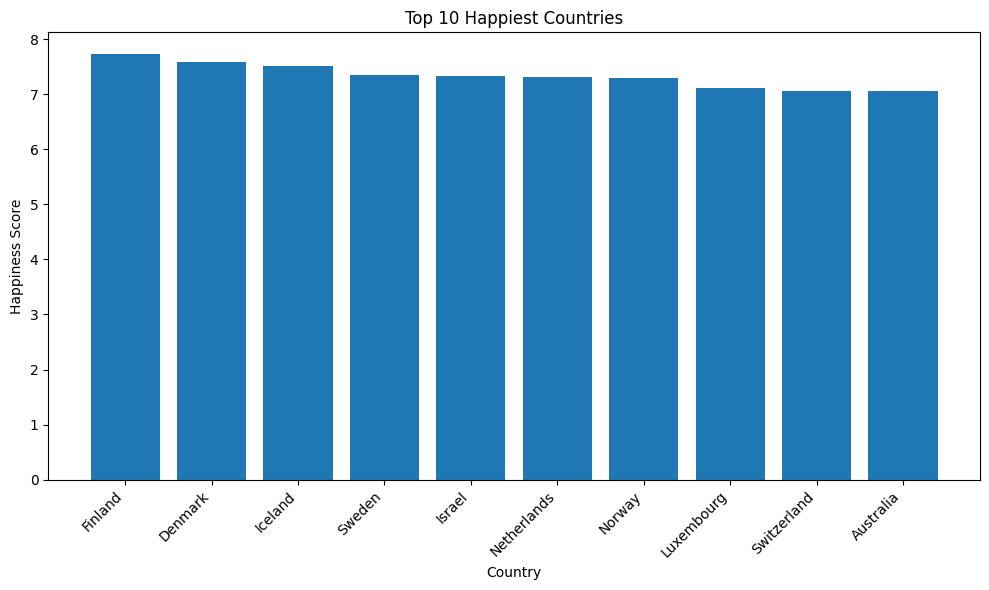

In [ ]:
top_10 = df.sort_values('score', ascending=False).head(10)
#creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10['Country name'], top_10['score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

•	Line Plot:

Plot the top 10 unhappiest countries by Score using a Line chart.

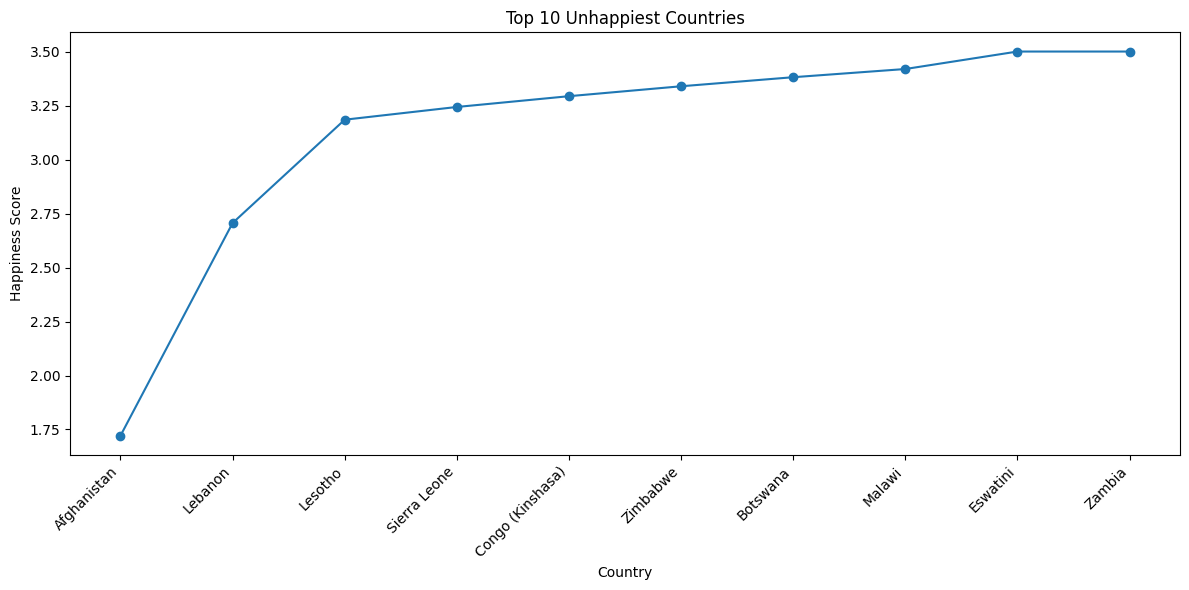

In [ ]:
#for top 10 lowest per score
bottom_10 = df.sort_values('score', ascending=True).head(10)
plt.figure(figsize=(12, 6))
plt.plot(bottom_10['Country name'], bottom_10['score'], marker='o', linestyle='-')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

•	Plot a histogram for the Score column to show its distribution and also interpret.

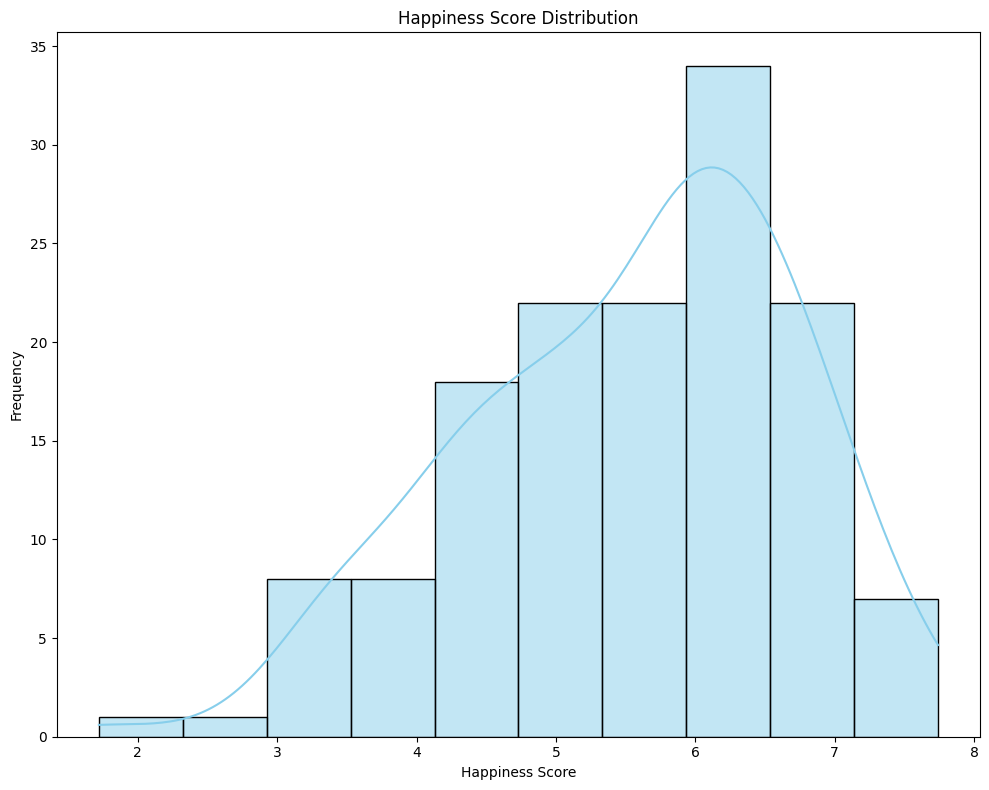

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['score'], bins=10, kde=True, color='skyblue')
plt.title("Happiness Score Distribution")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

•	Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

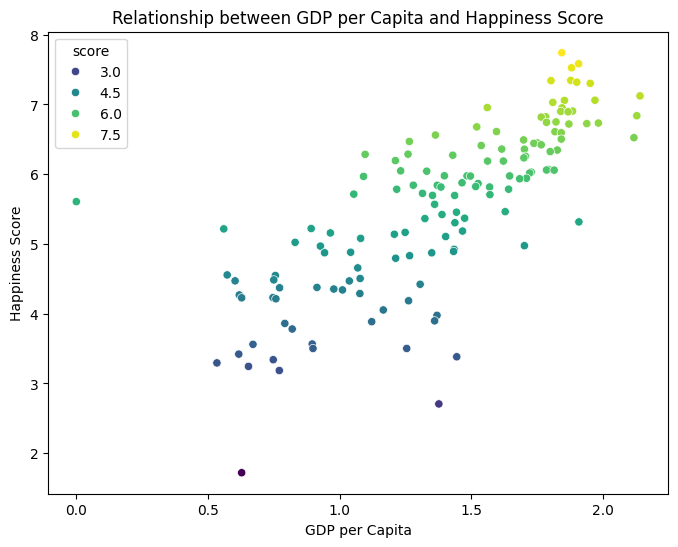

In [ ]:
plt.figure(figsize=(8, 6))
#scatter plot
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='score', palette='viridis')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.show()

Problem - 2

Some Advance Data Exploration Task:


Task - 1 Setup Task - Preparing the South-Asia Dataset


1. Define the countries in South Asia with a list for example:


south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]


In [ ]:
#country list
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

#displaying the filtered dataframe
south_asia_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low



2.	Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}


3.	Save the filtered dataframe as separate CSV files for future use.


In [ ]:
south_asia_df = df[df['Country name'].isin(south_asian_countries)]
#saving data to csv file
south_asia_df.to_csv('filtered_south_asia_data.csv', index=False)

<blank>

Task - 2 - Composite Score Ranking: Tasks:


1.	Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:


In [ ]:
south_asia_df.loc[:, 'Composite Score'] = (
    0.40 * south_asia_df.loc[:, 'Log GDP per capita'] +
    0.30 * south_asia_df.loc[:, 'Social support'] +
    0.30 * south_asia_df.loc[:, 'Healthy life expectancy']
)

south_asia_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774


2.	Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
ranked_south_asia = south_asia_df.sort_values(by=['Composite Score'], ascending=False)
ranked_south_asia[['Country name', 'Composite Score']]

,Country name,Composite Score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


3.	Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

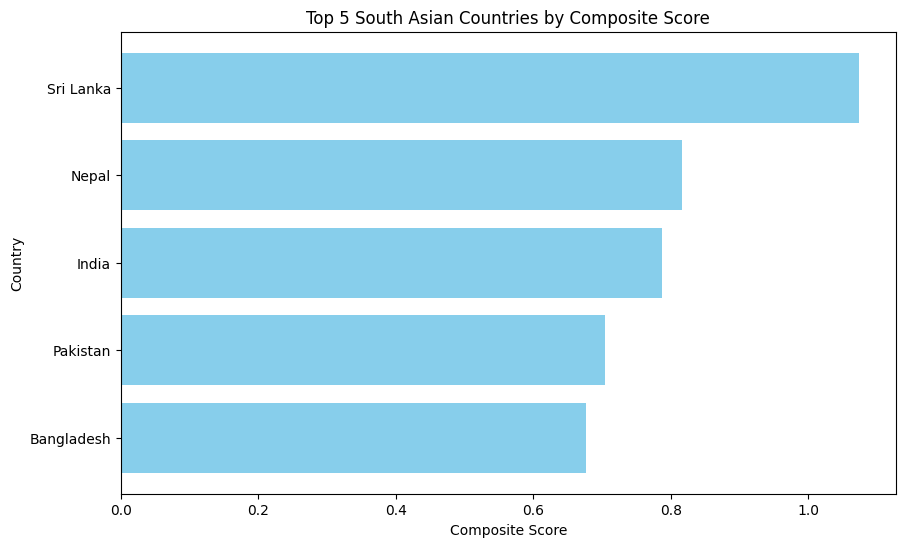

In [ ]:
#defining variable top_5_sa
top_5_sa = ranked_south_asia.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_sa['Country name'], top_5_sa['Composite Score'], color='skyblue')
#label for x and y
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()

4.	Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

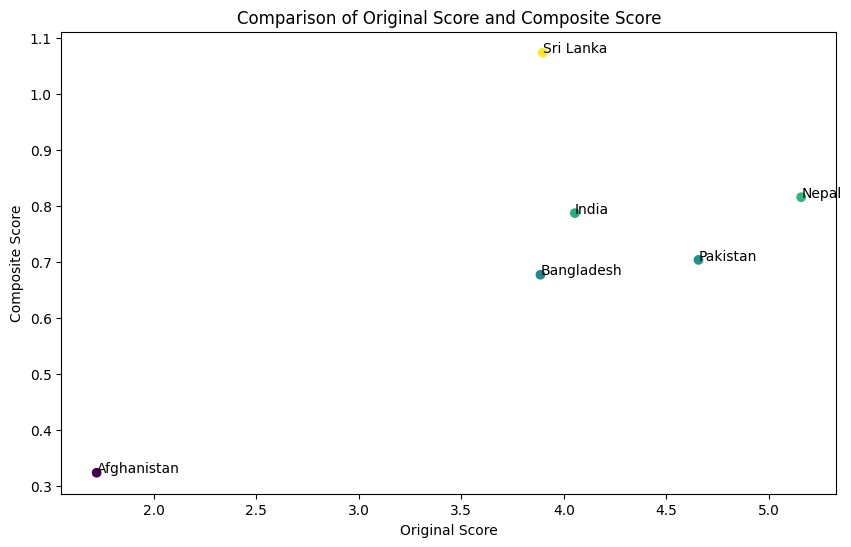

In [ ]:
comparison_df = south_asia_df[['Country name', 'score', 'Composite Score']]
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['score'], comparison_df['Composite Score'], c=comparison_df['Composite Score'], cmap='viridis')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.title('Comparison of Original Score and Composite Score')

#loop to add country labels to the points
for i, row in comparison_df.iterrows():
    plt.annotate(row['Country name'], (row['score'], row['Composite Score']))
plt.show()

while the rankings based on the composite score do not perfectly align with the original Score there is a moderate level of agreement between them




Task - 3 Outlier Detection:


1.	Identify outlier countries in South Asia based on their Score and GDP per Capita.


In [ ]:
#select the columns
data = south_asia_df[['score', 'Log GDP per capita']]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
outliers = data[(data > upper_bound) | (data < lower_bound)].any(axis=1)
outlier_countries = south_asia_df[outliers]['Country name']
#printing the output
print("outlier countries:")
print(outlier_countries)

outlier countries:
142    Afghanistan
Name: Country name, dtype: object


2.	Define outliers using the 1.5 × IQR rule.
--> IQR Calculation: The Interquartile Range (IQR) is calculated as the difference between the third quartile (Q3) and the first quartile (Q1).  Any data point that falls above the upper bound or below the lower bound is considered an outlier.

In [ ]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

3.	Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.

---



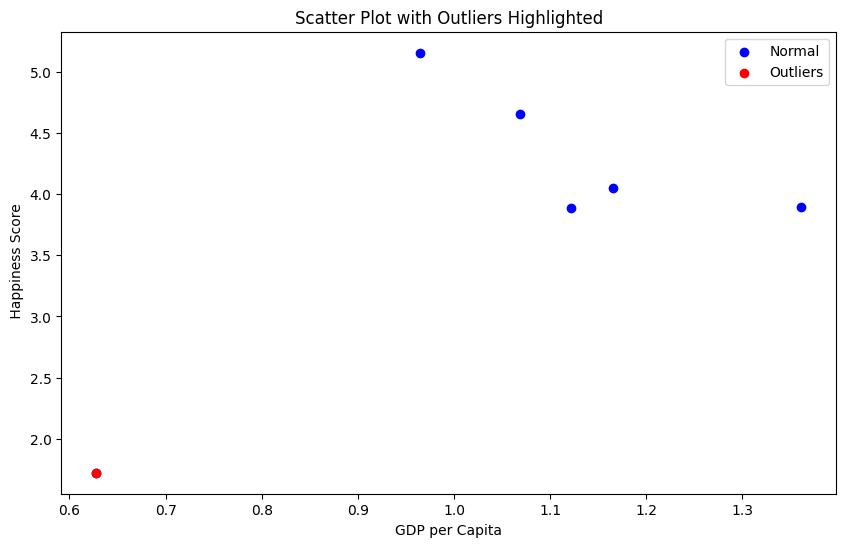

In [ ]:
#outliers Series
outliers_index = south_asia_df.index[outliers.values]
#scatter plot for visualization
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Normal', c='blue')
plt.scatter(south_asia_df.loc[outliers_index, 'Log GDP per capita'], south_asia_df.loc[outliers_index, 'score'], label='Outliers', c='red')
plt.xlabel('GDP per Capita')
plt.ylabel(' Happiness Score')
plt.title('Scatter Plot with Outliers Highlighted')
plt.legend()
plt.show()

4.	Discuss the characteristics of these outliers and their potential impact on regional averages.

characteristics of outliers are listed below:

--> higher/lower GDP per Capita:

When compared to other countries in the region, outliers may have much higher or lower GDP per capita.

--> higher/lower Happiness Score:


In comparison to their regional equivalents, outliers might have significantly higher or lower happiness levels.

--> eviation from the Trend:

In the scatter plot between GDP per capita and happiness score, outliers frequently deviate from the main trend. They could stand for exceptional situations or particular situations in the area.

--Skewing Averages, misrepresenting regional trends and influencing policy decisions are the potential impact on regional averages

Task - 4 - Exploring Trends Across Metrics: Tasks:
1.	Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.


In [ ]:
#relevant columns
metrics = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']]

#pearson correlation
correlation_freedom = metrics['score'].corr(metrics['Freedom to make life choices'])
correlation_generosity = metrics['score'].corr(metrics['Generosity'])
#output
print(f"Correlation between Score and Freedom to make life choices: {correlation_freedom}")
print(f"Correlation between Score and Generosity: {correlation_generosity}")

Correlation between Score and Freedom to make life choices: 0.8005185224163315
Correlation between Score and Generosity: 0.874512371253192


2.	Create scatter plots with trendlines for these metrics against the Score.

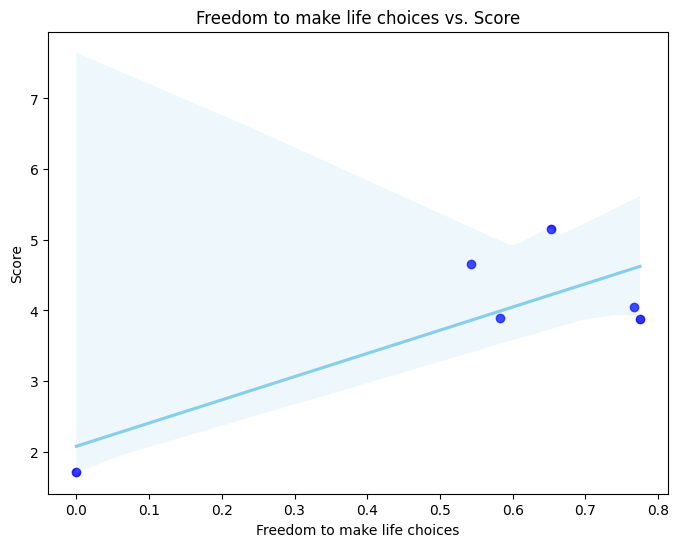

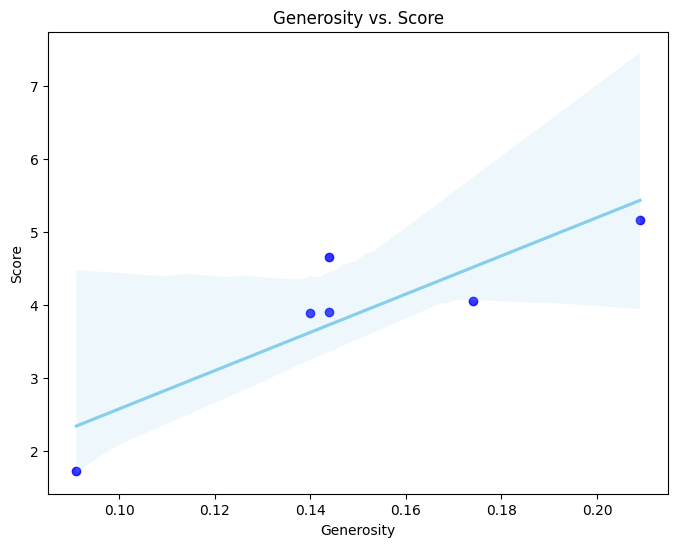

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, color='blue', line_kws={"color": "skyblue"})
plt.title('Freedom to make life choices vs. Score')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.show()
plt.figure(figsize=(8, 6))
sns.regplot(x='Generosity', y='score', data=south_asia_df, color='blue', line_kws={"color": "skyblue"})
plt.title('Generosity vs. Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

3.	Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.



chosen metrics "Freedom to make life choices" and "Generosity" and the "Score" for South Asian countries based on the calculated Pearson correlation coefficients and the scatter plots with trendlines.


Pearson Correlation Coefficients:

1. Freedom to make life choices:

    Score and Freedom to make life decisions should have a strong positive connection, as indicated by a relatively high and positive correlation coefficient nearer to 1.

2. Generosity:
   
   Score and Generosity must have a relatively low correlation coefficient, which may be either positive or negative nearer to 0, suggesting that there is a weak or possibly no significant linear link.
   

Scatter Plots with Trendlines:

 freedom to make life decisions and generosity summary:

 the scatter plot should show a clear positive trend, with points generally clustered around a trendline with a positive slope while the scatter plot should show a clear positive trend, with points generally clustered around a trendline with a positive slope.



Based on the analysis of the correlation coefficients and scatter plots, we can identify the following relationships: strongest and weakest relationship

1. strongest relationship:

    Score and Freedom to make life choices probably have the strongest correlation. This implies that one important element affecting happiness in South Asian nations is the ability to make decisions about one's life. People tend to be happier overall when they have greater freedom and choice in their life


2. weakest relationship:

   Score and Generosity have perhaps the smallest relationship. This suggests that in this area, generosity may not be as closely linked to happiness. Happiness levels may be more significantly influenced by other factors, such as economic conditions or social culture



   overall summary:


   using the Composite Score, the study identified outliers that diverge from regional trends, investigated the connections between various metrics and happiness, and offered insights into the well-being of South Asian nations. Interpreting the results and making informed deductions regarding the elements influencing happiness in this area require an understanding of these definitions and important concepts.

Task - 5 - Gap Analysis:
Tasks:
1.	Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.


In [ ]:
south_asia_df.loc[:, 'GDP-Score Gap'] = south_asia_df.loc[:, 'Log GDP per capita'] - south_asia_df.loc[:, 'score']
south_asia_df.head()

<ipython-input-61-c1bcd078dd12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df.loc[:, 'GDP-Score Gap'] = south_asia_df.loc[:, 'Log GDP per capita'] - south_asia_df.loc[:, 'score']


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764


2.	Rank the South Asian countries by this gap in both ascending and descending order.

In [ ]:
#ascending order
ascending_ranked = south_asia_df.sort_values(by=['GDP-Score Gap'])
print("Ascending Order:")
print(ascending_ranked[['Country name', 'GDP-Score Gap']])
#descending order
descending_ranked = south_asia_df.sort_values(by=['GDP-Score Gap'], ascending=False)
print("\nDescending Order:")
print(descending_ranked[['Country name', 'GDP-Score Gap']])

Ascending Order:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Descending Order:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


3.	Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.




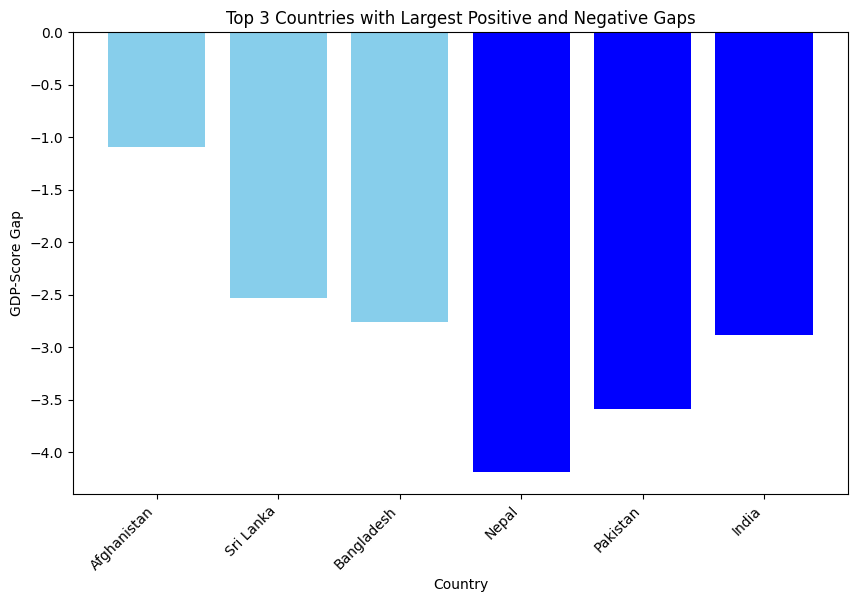

In [ ]:
top_positive_gap = descending_ranked.head(3)
top_negative_gap = ascending_ranked.head(3)

# Combine the data for plotting
combined_data = pd.concat([top_positive_gap, top_negative_gap])

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(combined_data['Country name'], combined_data['GDP-Score Gap'], color=['skyblue', 'skyblue', 'skyblue', 'blue', 'blue', 'blue'])
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Countries with Largest Positive and Negative Gaps')
plt.xticks(rotation=45, ha='right')
plt.show()

4.	Analyze the reasons behind these gaps and their implications for South Asian countries.

--> let's analyze the reasons behind the "GDP-Score Gap" observed in South Asian countries.

Reasons for Positive Gaps (Higher GDP, Lower Happiness):



1.   Economic Inequality:  Even with strong GDP development, social unrest and discontent can result from an unequal distribution of wealth and resource
2.   Social Issues: Factors like corruption, lack of social support, or political instability can negatively impact happiness despite economic progress.
3.   Cultural Factors: Despite higher GDP, traditional beliefs and cultural norms may place a larger priority on other facets of well-being than material wealth, which could result in lower levels of happiness.




Reasons for Negative Gaps (Lower GDP, Higher Happiness):

1. Strong Social Support:Even in difficult economic times, happiness can be influenced by close-knit communities and solid social relationships.

2. Cultural Values:Despite a lower GDP, happiness can be fostered by a cultural emphasis on community, spirituality, or other non-material values.

3. Resilience and Adaptability: Despite a reduced GDP, communities may be happier because they have adapted coping strategies and tenacity to deal with economic stress.

Implication for South asian countries

1. Focus on Inclusive Growth:  policymakers should prioritize inclusive economic growth that benefits all segments of society, reducing inequality and promoting social mobility

2. Addressing Social Issues: to increase happiness it is essential to combat corruption, strengthen social support networks and advance political stability

3. Promoting Sustainable Development: balancing economic growth with environmental sustainability is essential for long-term well-being

4. Rethinking Development Indicators: shifting focus from solely economic indicators to broader measures of well-being, like the Happiness Index, can provide a more holistic view of progress

5. Learning from Outliers: sudying countries with negative gaps can provide valuable lessons for other nations on how to achieve higher happiness despite economic constraints

In South Asian nations, the GDP-Score Gap draws attention to the deep connection between happiness and economic performance. It highlights how crucial it is to take into account social, cultural, and environmental aspects in addition to economic progress in order to improve well-being in general. South Asian nations may work toward a more sustainable and balanced development path that puts their populations' happiness and well-being first by solving the root causes of these gaps.

Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset: Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]


In [ ]:
#creating the list of Middle Eastern Countries

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

middle_east_df=df[df['Country name'].isin(middle_east_countries)]

middle_east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


Complete the following task:
1.	Descriptive Statistics:


Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [ ]:
# Calculate mean and standard deviation for South Asia
south_asia_mean_score = south_asia_df['score'].mean()
south_asia_std_score = south_asia_df['score'].std()

# Calculate mean and standard deviation for Middle East
middle_east_mean_score = middle_east_df['score'].mean()
middle_east_std_score = middle_east_df['score'].std()

# Displaying the results for sa and middle east
print("South Asia:")
print(f"Mean Score: {south_asia_mean_score}")
print(f"Standard Deviation: {south_asia_std_score}")

print("\nMiddle East:")
print(f"Mean Score: {middle_east_mean_score}")
print(f"Standard Deviation: {middle_east_std_score}")

South Asia:
Mean Score: 3.895666666666667
Standard Deviation: 1.1770690152521504

Middle East:
Mean Score: 5.412100000000001
Standard Deviation: 1.5662011684327144


•	Which region has higher happiness Scores on average?

In [ ]:
#calculate average happiness scores for each region
south_asia_avg_score = south_asia_df['score'].mean()
middle_east_avg_score = middle_east_df['score'].mean()
#comparing the average scores
if south_asia_avg_score > middle_east_avg_score:
    print("South Asia has higher happiness scores on average.")
elif middle_east_avg_score > south_asia_avg_score:
    print("Middle East has higher happiness scores on average.")
else:
    print("Both regions have the same average happiness score.")

Middle East has higher happiness scores on average.


2. Top and Bottom Performers:


  Identify the top 3 and bottom 3 countries in each region based on the score.


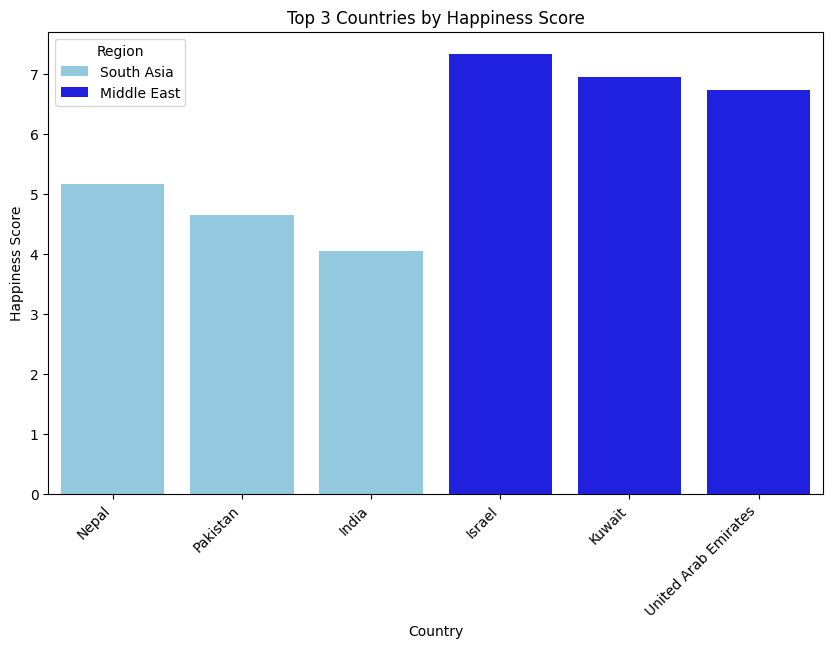

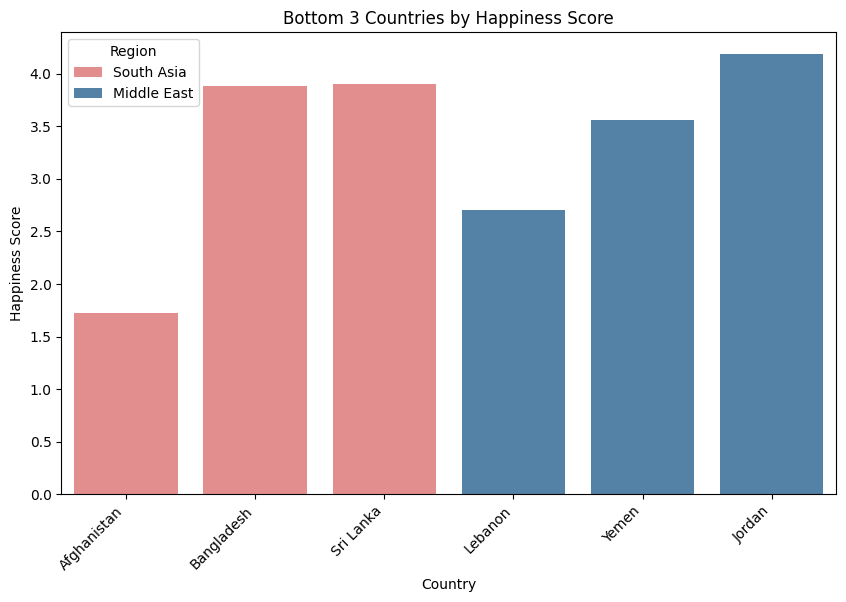

In [ ]:
#top 3 and bottom 3 for south asia
south_asia_top3 = south_asia_df.sort_values(by=['score'], ascending=False).head(3)['Country name']
south_asia_bottom3 = south_asia_df.sort_values(by=['score']).head(3)['Country name']

#top 3 and bottom 3 for middle east
middle_east_top3 = middle_east_df.sort_values(by=['score'], ascending=False).head(3)['Country name']
middle_east_bottom3 = middle_east_df.sort_values(by=['score']).head(3)['Country name']

# Get top 3 and bottom 3 countries for each region
south_asia_top3 = south_asia_df.sort_values(by=['score'], ascending=False).head(3)
south_asia_bottom3 = south_asia_df.sort_values(by=['score']).head(3)
middle_east_top3 = middle_east_df.sort_values(by=['score'], ascending=False).head(3)
middle_east_bottom3 = middle_east_df.sort_values(by=['score']).head(3)

# Plotting Top 3 countries ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', hue='Region', data=pd.concat([south_asia_top3.assign(Region='South Asia'), middle_east_top3.assign(Region='Middle East')]), palette={'South Asia': 'skyblue', 'Middle East': 'blue'})
plt.title('Top 3 Countries by Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.show()

# --- Plotting Bottom 3 countries ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', hue='Region', data=pd.concat([south_asia_bottom3.assign(Region='South Asia'), middle_east_bottom3.assign(Region='Middle East')]), palette={'South Asia': 'lightcoral', 'Middle East': 'steelblue'})
plt.title('Bottom 3 Countries by Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.show()

•	Plot bar charts comparing these charts.

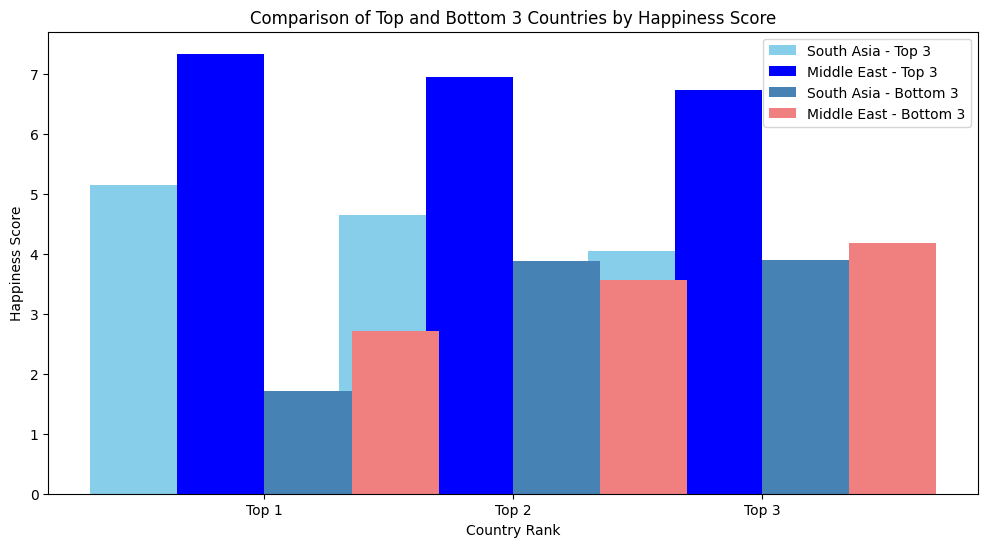

In [ ]:
#datas for the bar charts
south_asia_top3_scores = south_asia_df.sort_values(by=['score'], ascending=False).head(3)['score']
south_asia_bottom3_scores = south_asia_df.sort_values(by=['score']).head(3)['score']
middle_east_top3_scores = middle_east_df.sort_values(by=['score'], ascending=False).head(3)['score']
middle_east_bottom3_scores = middle_east_df.sort_values(by=['score']).head(3)['score']
#setting width for bar chart
bar_width = 0.35
#top/bottom 3
index = np.arange(3)
fig, ax = plt.subplots(figsize=(12, 6))

#bar charts for top 3 countries
rects1 = ax.bar(index, south_asia_top3_scores, bar_width, label='South Asia - Top 3', color='skyblue')
rects2 = ax.bar(index + bar_width, middle_east_top3_scores, bar_width, label='Middle East - Top 3', color='blue')

#bar charts for bottom 3 countries
rects3 = ax.bar(index + 2 * bar_width, south_asia_bottom3_scores, bar_width, label='South Asia - Bottom 3', color='steelblue')
rects4 = ax.bar(index + 3 * bar_width, middle_east_bottom3_scores, bar_width, label='Middle East - Bottom 3', color='lightcoral')

#labels and titles for bar chart
ax.set_xlabel('Country Rank')
ax.set_ylabel('Happiness Score')
ax.set_title('Comparison of Top and Bottom 3 Countries by Happiness Score')
ax.set_xticks(index + 1.5 * bar_width)
#top and bottom 3
ax.set_xticklabels(['Top 1', 'Top 2', 'Top 3'])
ax.legend()
plt.show()

3.	Metric Comparisons:
•	Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.


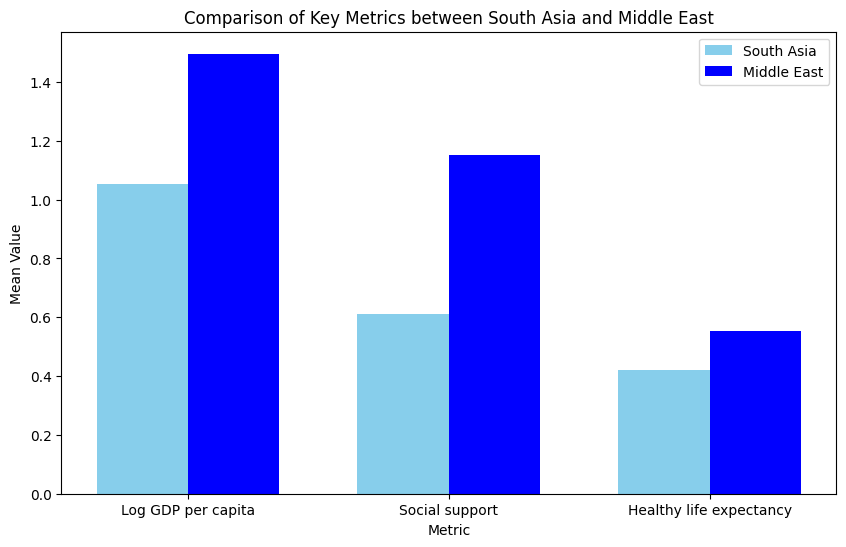

In [ ]:
# Metrics to compare
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Calculate mean values for each metric in each region
south_asia_means = [south_asia_df[metric].mean() for metric in metrics]
middle_east_means = [middle_east_df[metric].mean() for metric in metrics]

# Set up the bar chart
bar_width = 0.35
index = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))

# Bar charts for each region
rects1 = ax.bar(index, south_asia_means, bar_width, label='South Asia', color='skyblue')
rects2 = ax.bar(index + bar_width, middle_east_means, bar_width, label='Middle East', color='blue')

# Customize the bar chart
ax.set_xlabel('Metric')
ax.set_ylabel('Mean Value')
ax.set_title('Comparison of Key Metrics between South Asia and Middle East')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

•	Which metrics show the largest disparity between the two regions?
according to the bar chart the largest disparity between thw 2 regions is "SOCIAL SUPPORT METRIC".

<blank>

4.	Happiness Disparity:


•	Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.


In [ ]:
#calculating range and coefficient of variation for SA
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()

#calculating range and coefficient of variation for middle east
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

#output
print("South Asia:")
print(f"Range of Score: {south_asia_range}")
print(f"Coefficient of Variation: {south_asia_cv}")

print("\nMiddle East:")
print(f"Range of Score: {middle_east_range}")
print(f"Coefficient of Variation: {middle_east_cv}")

South Asia:
Range of Score: 3.4370000000000003
Coefficient of Variation: 0.3021482883337427

Middle East:
Range of Score: 4.634
Coefficient of Variation: 0.28938880812119405


•	Which region has greater variability in happiness?


--> south asia has greater variability in happiness because it has larger range and a higher CV compared to the Middle East.

<blank>


5.	Correlation Analysis:


•	Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.


In [ ]:
#correlation analysis for south asia
south_asia_correlations = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

#correlation analysis for middle east
middle_east_correlations = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

#correlation matrices for south asia
print("South Asia Correlations:")
print(south_asia_correlations)
#for middle east
print("\nMiddle East Correlations:")
print(middle_east_correlations)

South Asia Correlations:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  

Middle East Correlations:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


•	Create scatter plots to visualize and interpret the relationships.

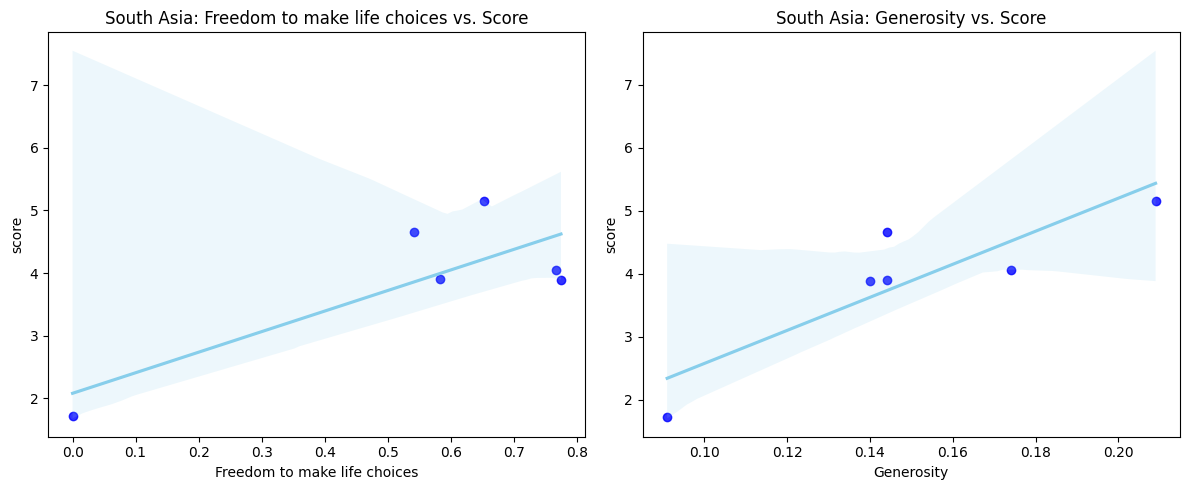

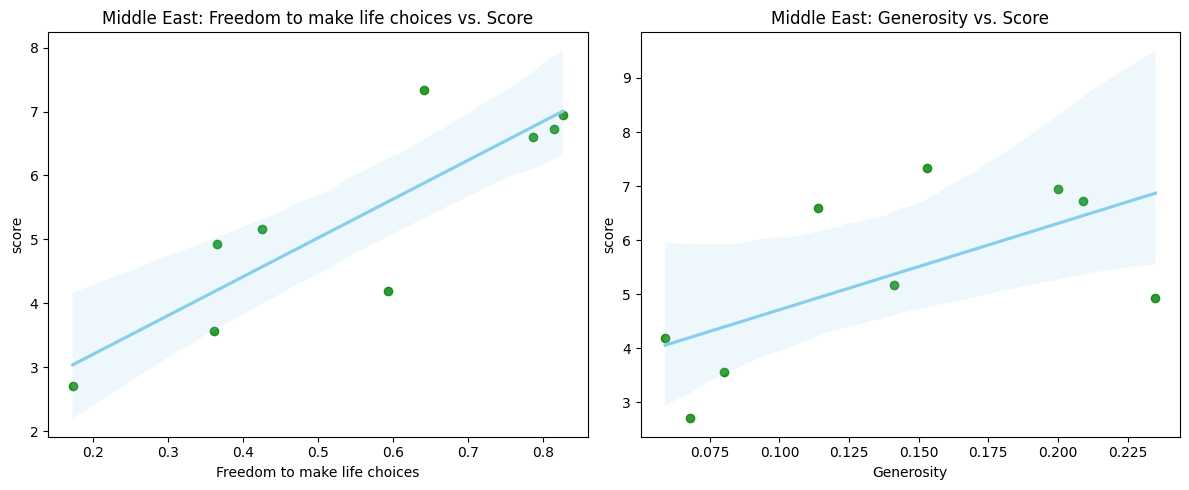

In [ ]:
#scatter plots for SA
plt.figure(figsize=(12, 5))
#subplot for freedom to make life choices

plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, color='blue', line_kws={"color": "skyblue"})
plt.title('South Asia: Freedom to make life choices vs. Score')
# subplot for Generosity
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia_df, color='blue', line_kws={"color": "skyblue"})
plt.title('South Asia: Generosity vs. Score')
plt.tight_layout()
plt.show()

#Scatter plots for Middle East
plt.figure(figsize=(12, 5))
#subplot for freedom to make life choices
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_df, color='green', line_kws={"color": "skyblue"})
plt.title('Middle East: Freedom to make life choices vs. Score')

#subplot for Generosity
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=middle_east_df, color='green', line_kws={"color": "skyblue"})
plt.title('Middle East: Generosity vs. Score')

plt.tight_layout()
plt.show()

interpretatioon

6.	Outlier Detection:


Identify outlier countries in both regions based on Score and GDP per Capita.


In [ ]:
#function to detect outliers
def outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)]
    return outliers

#outliers for South Asia
sa_outliers = outlier(south_asia_df, 'score')  # Based on Score
sa_outliers_gdp = outlier(south_asia_df, 'Log GDP per capita')  # Based on GDP per Capita

#outliers for Middle East
me_outliers = outlier(middle_east_df, 'score')  # Based on Score
me_outliers_gdp = outlier(middle_east_df, 'Log GDP per capita')  # Based on GDP per Capita

#code output
print("South Asia Outliers (Score):")
print(sa_outliers[['Country name', 'score']])

print("\nSouth Asia Outliers (GDP per Capita):")
print(sa_outliers_gdp[['Country name', 'Log GDP per capita']])

print("\nMiddle East Outliers (Score):")
print(me_outliers[['Country name', 'score']])

print("\nMiddle East Outliers (GDP per Capita):")
print(me_outliers_gdp[['Country name', 'Log GDP per capita']])

South Asia Outliers (Score):
    Country name  score
142  Afghanistan  1.721

South Asia Outliers (GDP per Capita):
    Country name  Log GDP per capita
142  Afghanistan               0.628

Middle East Outliers (Score):
Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East Outliers (GDP per Capita):
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


•	Plot these outliers and discuss their implications.

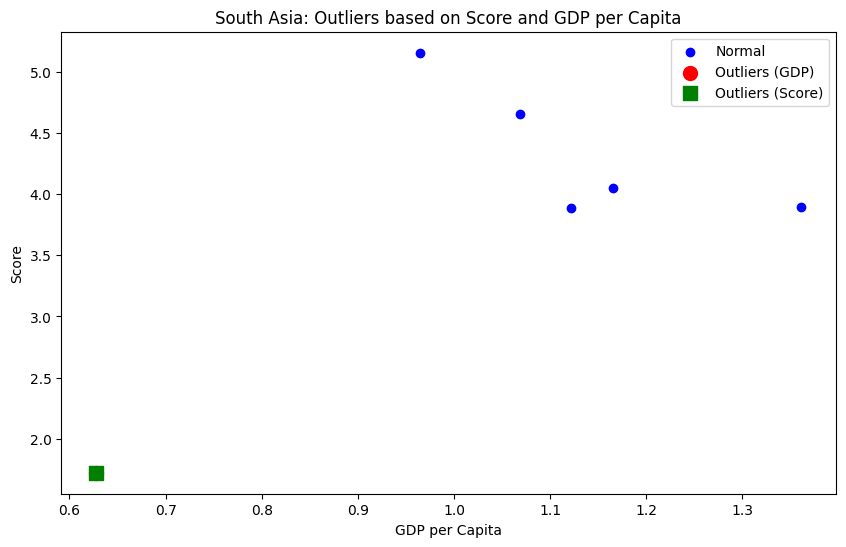

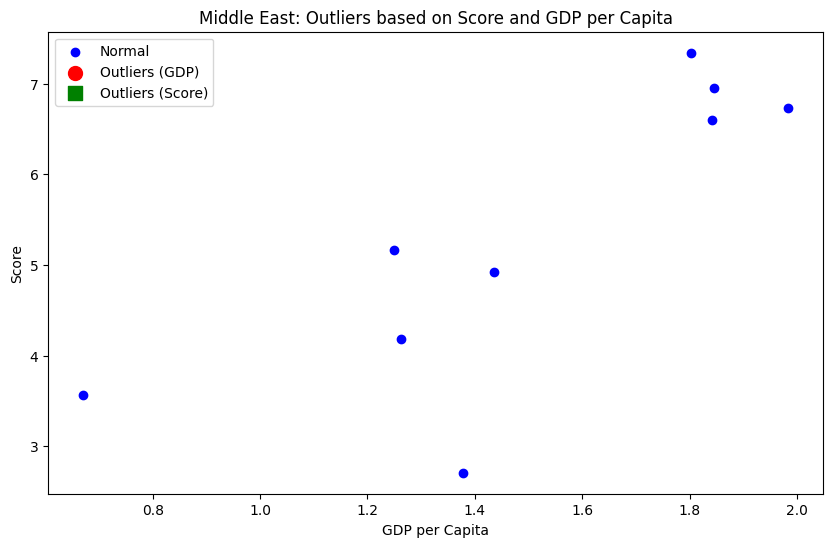

In [ ]:
#scatter plot for South Asia
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Normal', c='blue')
#for GDP
plt.scatter(sa_outliers_gdp['Log GDP per capita'], sa_outliers_gdp['score'], label='Outliers (GDP)', c='red', marker='o', s=100)
#for score
plt.scatter(sa_outliers['Log GDP per capita'], sa_outliers['score'], label='Outliers (Score)', c='green', marker='s', s=100)
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.title('South Asia: Outliers based on Score and GDP per Capita')
plt.legend()
plt.show()

#scatter plot for Middle East
plt.figure(figsize=(10, 6))
plt.scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], label='Normal', c='blue')
plt.scatter(me_outliers_gdp['Log GDP per capita'], me_outliers_gdp['score'], label='Outliers (GDP)', c='red', marker='o', s=100)  #GDP outliers in red
plt.scatter(me_outliers['Log GDP per capita'], me_outliers['score'], label='Outliers (Score)', c='green', marker='s', s=100)  #Score outliers in green
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.title('Middle East: Outliers based on Score and GDP per Capita')
plt.legend()
plt.show()

<blank>

Discussions of Implications

Identifying Outliers:

the outlier nations in each region are visually highlighted by the scatter plots according to their GDP per capita and happiness ratings. This makes it simple to identify nations that greatly depart from the averages

Understanding Deviations:

we can learn more about the characteristics of the deviations by examining the locations of outliers on the scatter plots. Countries with high GDP but low levels of happiness, for instance, may be a sign that wealth is not always a result of economic success. On the other hand, nations with low GDP but high levels of happiness may indicate the significance of additional elements like cultural values or social support

Regional Comparisons:

comparision between regions in the elements affecting happiness can be found by comparing the outlier patterns between the Middle East and South Asia. For example, a region may have more economic disparity or a larger focus on material wealth if it has more outliers in terms of GDP per capita

summary:  by plotting and discussing the outliers, we can gain a deeper understanding of the complexities of happiness and well-being in south asia and the middle east and identify potential areas for policy interventions or further research.

7.	Visualization:

•	Create boxplots comparing the distribution of Score between South Asia and the Middle East.


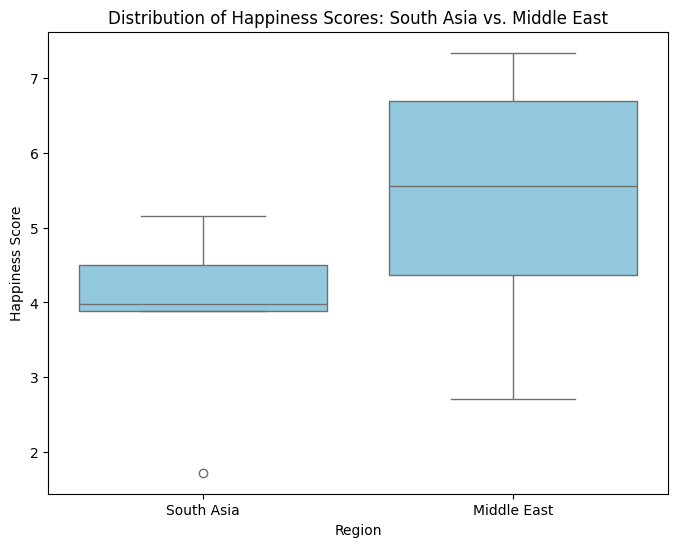

In [ ]:
#creating boxplots comparing the distribution of Score between South Asia and the Middle East.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asia_df.assign(Region='South Asia'),
middle_east_df.assign(Region='Middle East')]), color="skyblue")
plt.title('Distribution of Happiness Scores: South Asia vs. Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

•	Interpret the key differences in distribution shapes, medians, and outliers.

Distribution Shapes:

Symmetry/Skewness: we can obeerve the shape of the boxes and whiskers in the boxplots above, if the boxes and whiskers are relatively symmetrical it indicates a roughly symmetrical distribution of happiness scores in that region.
if the box and one whisker are longer than the other, it suggests a skewed distribution. A longer whisker towards higher values indicates a right skew (positive skew), while a longer whisker towards lower values indicates a left skew (negative skew)

Medians:

The horizontal line within each box represents the median happiness score for that region the middle is visibly higher

Outliers:

south asia exhibits a few outliers with lower happiness scores, indicating countries with significantly lower happiness scores compared to the rest of the region.

middle east also has a couple of outliers but they are positioned towards higher happiness scores and only one towards lower.

interpretation

Distribution Shapes: south asia has a slightly right-skewed distribution while the middle east has a more symmetrical distribution


Medians: The median happiness score for the Middle East is slightly higher than that of south asia


Outliers: south asia has a few outliers towards lower happiness scores, while the Middle East has one outlier towards a higher happiness score




--> based on this interpretation, we could interpret the key differences


middle east generally has higher happiness scores on average higher median
Happiness scores in South Asia are more spread out and have a slightly skewed distribution, suggesting greater variability.
There are a few countries in South Asia with significantly lower happiness scores than the rest of the region outliers while themiddle east has one country with a notably higher happiness score.